# Exploratory Data analysis

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from utils import*

In [2]:
#Select the dataset of one year in one state
YEAR=2017
STATE="Andhra Pradesh_Kharif"

#Path to the dataset
pathData = f"RawData/{str(YEAR)}/{str(YEAR)}_{STATE}.xlsx"
print(pathData)

RawData/2017/2017_Andhra Pradesh_Kharif.xlsx


In [3]:
df = pd.read_excel(pathData)
#Clean an add loss to data
df=clean_data(add_Loss(df,YEAR-2))
df

MemoryError: Unable to allocate 13.1 GiB for an array with shape (5, 18735, 18735) and data type float64

## Data exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18735 entries, 0 to 18734
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cluster             18735 non-null  int64  
 1   District            18735 non-null  object 
 2   Season              18735 non-null  object 
 3   Crop                18735 non-null  object 
 4   Area Sown (Ha)      18735 non-null  float64
 5   Area Insured (Ha)   18735 non-null  float64
 6   SI Per Ha (Inr/Ha)  18735 non-null  int64  
 7   Sum Insured (Inr)   18735 non-null  float64
 8   Indemnity Level     18735 non-null  float64
 9   2006 Yield          18735 non-null  float64
 10  2007 Yield          18735 non-null  float64
 11  2008 Yield          18735 non-null  float64
 12  2009 Yield          18735 non-null  float64
 13  2010 Yield          18735 non-null  float64
 14  2011 Yield          18735 non-null  float64
 15  2012 Yield          18735 non-null  float64
 16  2013

In [ ]:
df["Indemnity Level"].unique()

array([0.8, 0.9])

In [ ]:
df['Cluster'].unique()

array([1, 2], dtype=int64)

In [ ]:
df["2010 Yield"].min(),df["2010 Yield"].max()

(0.0, 129974.0)

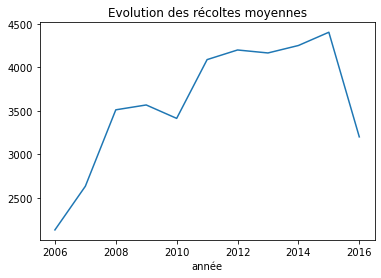

Distribution des récoltes en fonction du district


C:\Users\Amaury Lancelin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


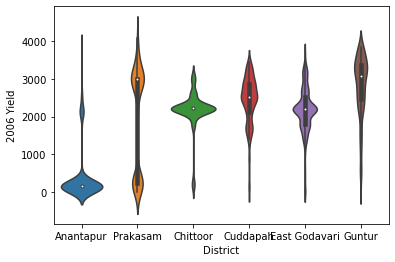

C:\Users\Amaury Lancelin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


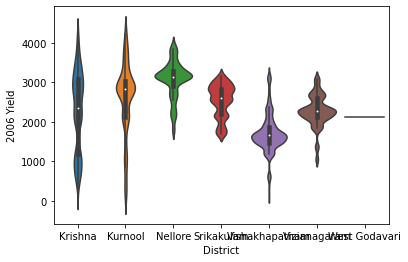

In [ ]:
yield_by_year = []
for year in range(2006,2017):
    yield_by_year.append(df[str(year) + " Yield"].mean())
plt.plot(range(2006,2017),yield_by_year)
plt.title("Evolution des récoltes moyennes")
plt.xlabel("année")
plt.show()

print("Distribution des récoltes en fonction du district")
sn.violinplot("District","2006 Yield",data=df[df["District"].isin(pd.unique(df["District"])[:6])])
plt.show()
sn.violinplot("District","2006 Yield",data=df[df["District"].isin(pd.unique(df["District"])[6:])])
plt.show()

<Figure size 720x720 with 0 Axes>

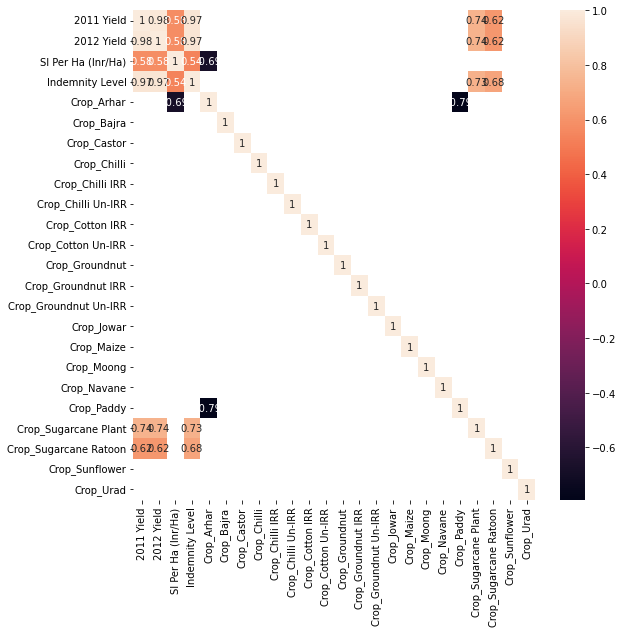

In [ ]:
df2 = df[["Crop","2011 Yield","2012 Yield","SI Per Ha (Inr/Ha)","Indemnity Level"]]
df2 = pd.get_dummies(df2)
plt.figure(figsize=(10, 10))
corrMatrix = df2.corr()
corrMatrix2 = corrMatrix.copy(deep = True)

for param in corrMatrix2.columns:
    corrMatrix2.loc[corrMatrix[param] >-2, param] = True
    corrMatrix2.loc[corrMatrix[param] >0.5, param] = False
    corrMatrix2.loc[corrMatrix[param] <-0.5, param] = False
plt.figure(figsize=(9, 9))
sn.heatmap(corrMatrix, annot=True,mask=corrMatrix2)
plt.show()

### PCA Analysis

CategoricalIndex(['Low', 'Medium', 'Medium+', 'High'], categories=['Low', 'Medium', 'Medium+', 'High'], ordered=True, dtype='category')


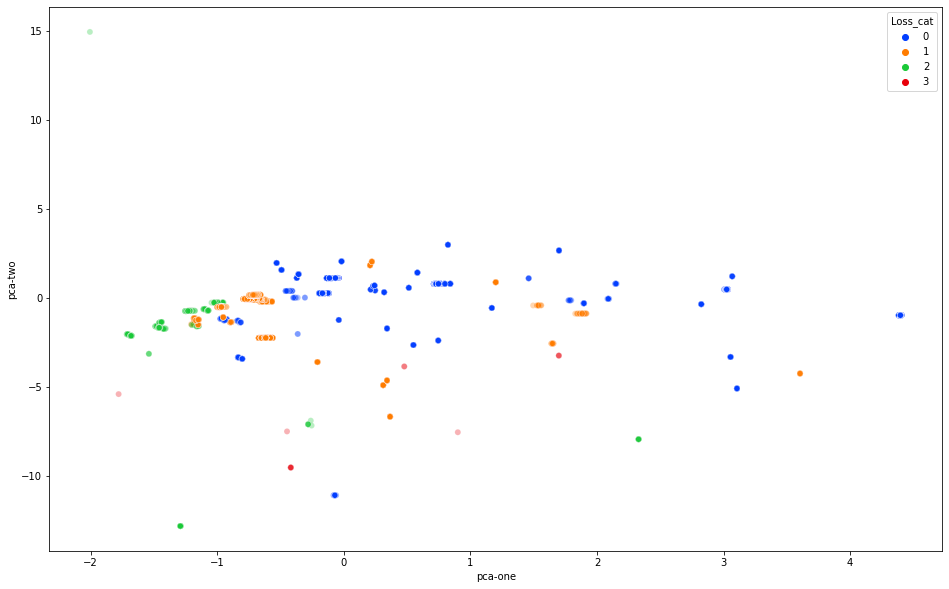

In [ ]:
# from sklearn.decomposition import PCA
# data = df[["District","Crop","2011 Yield","2012 Yield","SI Per Ha (Inr/Ha)","Indemnity Level"]]
# data2 = data.copy(deep = True)
# data2.drop(columns=["Crop"])
# data2 = pd.get_dummies(data2)

# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(data2)
# data['pca-one'] = pca_result[:,0]
# data['pca-two'] = pca_result[:,1] 
# plt.figure(figsize=(16,10))
# sn.scatterplot(
#     x="pca-one", y="pca-two",
#     hue="Crop",
#     data=data,
#     palette=sn.color_palette(palette="bright",n_colors=20),
#     legend="full",
#     alpha=0.3
# )
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = df.copy(deep=True)
data=df.drop(columns = ["Loss"])
data[["Area Sown (Ha)","Area Insured (Ha)","SI Per Ha (Inr/Ha)","Sum Insured (Inr)","Indemnity Level",]] = scaler.fit_transform(data[["Area Sown (Ha)","Area Insured (Ha)","SI Per Ha (Inr/Ha)","Sum Insured (Inr)","Indemnity Level",]])
list_label_yield = []
for year in range(2006,2017):
    list_label_yield.append(str(year) + " Yield")
    data[[str(year) + " Yield"]] = scaler.fit_transform(data[[str(year) + " Yield"]])
data = pd.get_dummies(data)
for col in data.columns:
    if(col in ["Area Sown (Ha)","Area Insured (Ha)","SI Per Ha (Inr/Ha)","Sum Insured (Inr)","Indemnity Level",]):
        continue
    if col in list_label_yield:
        continue
    proba = data[col].sum()/data[col].size
    data[col] = data[col]/np.sqrt(proba)
    data[col] = data[col] - data[col].mean()



data=data.assign(Loss_cat=pd.cut(df['Loss'],  bins=[df['Loss'].min()-1,df['Loss'].max()/1000,df['Loss'].max()/100,df['Loss'].max()/10,df['Loss'].max()+1], labels=['Low','Medium','Medium+','High']))
data["Loss_cat"],uniques=pd.factorize(data["Loss_cat"])
print(uniques)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)
data['pca-one'] = pca_result[:,0]
data['pca-two'] = pca_result[:,1] 
plt.figure(figsize=(16,10))
sn.scatterplot(
    x="pca-one", y="pca-two",
    data=data,
    palette=sn.color_palette(palette="bright",n_colors=4),
    hue='Loss_cat',
    legend="full",
    alpha=0.3
)
plt.show()

In [ ]:
pca.components_.shape

(2, 52)

## UMAP

In [ ]:
import umap
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings("ignore")

# #Preprocessing numerical
numerical = df.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = df.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(df.select_dtypes(include='object').columns) / df.shape[1]

In [ ]:
# from umap import UMAP

fit1 = umap.UMAP(metric='l2').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

In [ ]:
import umap.umap_ as uu

# #Augmenting the numerical embedding with categorical
intersection = uu.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = uu.reset_local_connectivity(intersection)
embedding = uu.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, False, densmap_kwds="Salut", output_dens=False)

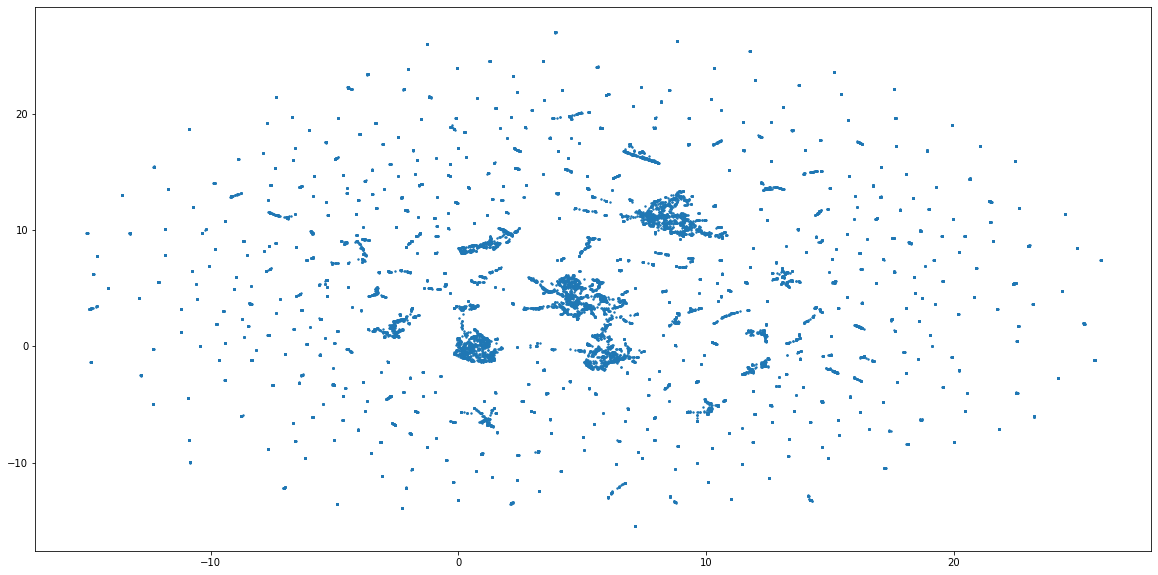

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(*embedding[0].T, s=2, cmap='Spectral', alpha=1.0)
plt.show()

## K-Prototypes

In [ ]:
full_data=df.copy(deep=True)
import kmodes
from kmodes.kprototypes import KPrototypes

NameError: name 'df' is not defined

In [ ]:
kprot_data = full_data.copy()
#Pre-processing
for c in full_data.select_dtypes(exclude='object').columns:
    pt = PowerTransformer()
    kprot_data[c] =  pt.fit_transform(np.array(kprot_data[c]).reshape(-1, 1))

categorical_columns = [1,2,3] #make sure to specify correct indices

#Actual clustering
kproto = KPrototypes(n_clusters= 15, init='Cao', n_jobs = 4)
clusters = kproto.fit_predict(kprot_data, categorical=categorical_columns)



In [ ]:
#Prints the count of each cluster group
pd.Series(clusters).value_counts()

0     3023
14    1929
3     1905
5     1528
2     1484
12    1351
8     1311
1     1219
7     1057
9     1027
11     984
6      907
10     570
13     341
4       99
dtype: int64

In [ ]:
# #OPTIONAL: Elbow plot with cost (will take a LONG time)
# costs = []
# n_clusters = []
# clusters_assigned = []

# for i in tqdm(range(2, 25)):
#     try:
#         kproto = KPrototypes(n_clusters= i, init='Cao', verbose=2)
#         clusters = kproto.fit_predict(kprot_data, categorical=[0, 6, 7, 9, 13])
#         costs.append(kproto.cost_)
#         n_clusters.append(i)
#         clusters_assigned.append(clusters)
#     except:
#         print(f"Can't cluster with {i} clusters")
        
# fig = go.Figure(data=go.Scatter(x=n_clusters, y=costs ))
# fig.show()

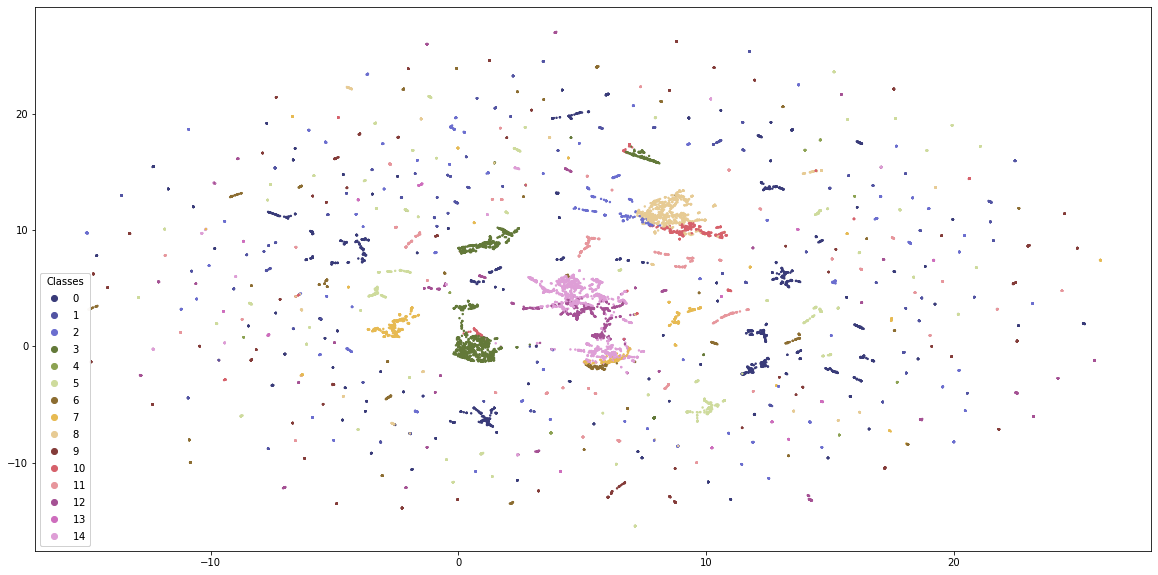

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
embedding=embedding[0]
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], s=2, c=clusters, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=15),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

## K-means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#One-Hot-Encoding
data = pd.get_dummies(full_data)

#Pre-processing
for c in data.columns:
    pt = PowerTransformer()
    data.loc[:, c] = pt.fit_transform(np.array(data[c]).reshape(-1, 1))

#Actual Clustering
kmeans = KMeans(n_clusters=15).fit(data)
kmeans_labels = kmeans.labels_

In [ ]:
# #OPTIONAL: Elbow plot with inertia
# #Elbow method to choose the optimal number of clusters
# sse = {}
# for k in tqdm(range(2, 50)):
#     kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
#     sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
# fig = go.Figure(data=go.Scatter(x=list(sse.keys()), y=list(sse.values())))
# fig.show()

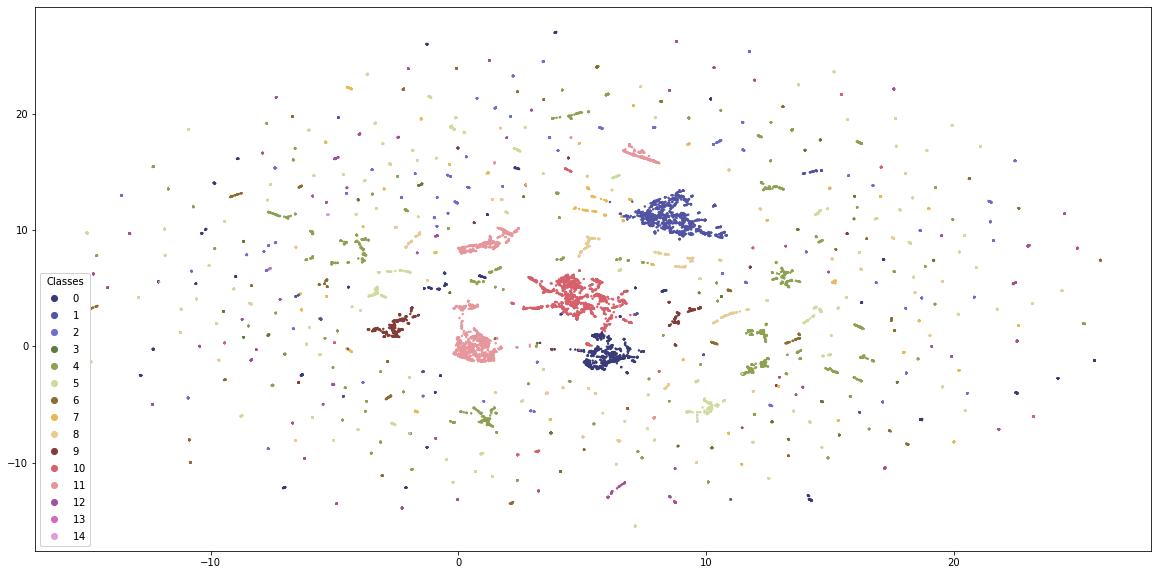

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], s=2, c=kmeans_labels, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=15),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)